In [1]:
import matplotlib.pyplot
plt = matplotlib.pyplot

In [2]:
from fastflow_subint_module import FFPipeline

def busy_work():
    i = 0
    while (i < 40000000):
        i = i + 1

class sourcestage():
    def __init__(self, id):
        self.counter = 1
        self.id = id

    def svc_init(self):
        print(f'[{self.id} | source] svc_init was called')
        return 0

    def svc(self, *args):
        print(f'[{self.id} | source] svc, counter = {self.counter}, {args}')
        if self.counter == 6:
            return None
        self.counter += 1

        busy_work()

        return self.counter

    def svc_end(self):
        print(f'[{self.id} | source] svc_end was called')

class stage():
    def __init__(self, id):
        self.id = id

    def svc_init(self):
        print(f'[{self.id}] svc_init was called')
        return 0

    def svc(self, *args):
        print(f'[{self.id}] svc, {args}')

        busy_work()

        # just forward
        return args

    def svc_end(self):
        print(f'[{self.id}] svc_end was called')

class sinkstage():
    def __init__(self, id):
        self.id = id

    def svc_init(self):
        print(f'[{self.id} | sink] svc_init was called')
        return 0
    
    def svc(self, *args):
        print(f'[{self.id} | sink] svc, {args}')

        busy_work()

        return 0

    def svc_end(self):
        print(f'[{self.id} | sink] svc_end was called')

In [3]:
def build_pipe(nstages = 2, use_processes = True, use_subinterpreters = False):
    pipe = FFPipeline(use_subinterpreters)

    source = sourcestage("1")
    if use_processes:
        pipe.add_stage_process(source)
    else:
        pipe.add_stage(source)

    # count the sink and the source as stages
    for i in range(1, nstages - 1):
        innerstage = stage(f"{i+1}") # +1 beacuse i starts at 1 and 1 is the source
        if use_processes:
            pipe.add_stage_process(innerstage)
        else:
            pipe.add_stage(innerstage)
    
    sink = sinkstage(f"{nstages}")
    if use_processes:
        pipe.add_stage_process(sink)
    else:
        pipe.add_stage(sink)
    return pipe

In [4]:
def run_pipe(nstages, use_processes = False, use_subinterpreters = False):
    print(f"run pipe of {nstages} stages")
    pipe = build_pipe(nstages, use_processes, use_subinterpreters)
    pipe.run_and_wait_end()
    return pipe.ffTime()

In [5]:
use_processes = True
use_subinterpreters = False

# Standard

In [2]:
"""standard = [[],[]]
for i in range(2, 6): # from 2 to 5
    res = run_pipe(i, use_processes = False, use_subinterpreters = False)
    print(f"done in {res}ms")
    standard[0].append(i) # x
    standard[1].append(res) # y"""
standard = [[2, 3, 4, 5], [16081.938, 24087.624, 31354.781, 43254.694]]
print ("standard =", standard)

standard = [[2, 3, 4, 5], [16081.938, 24087.624, 31354.781, 43254.694]]


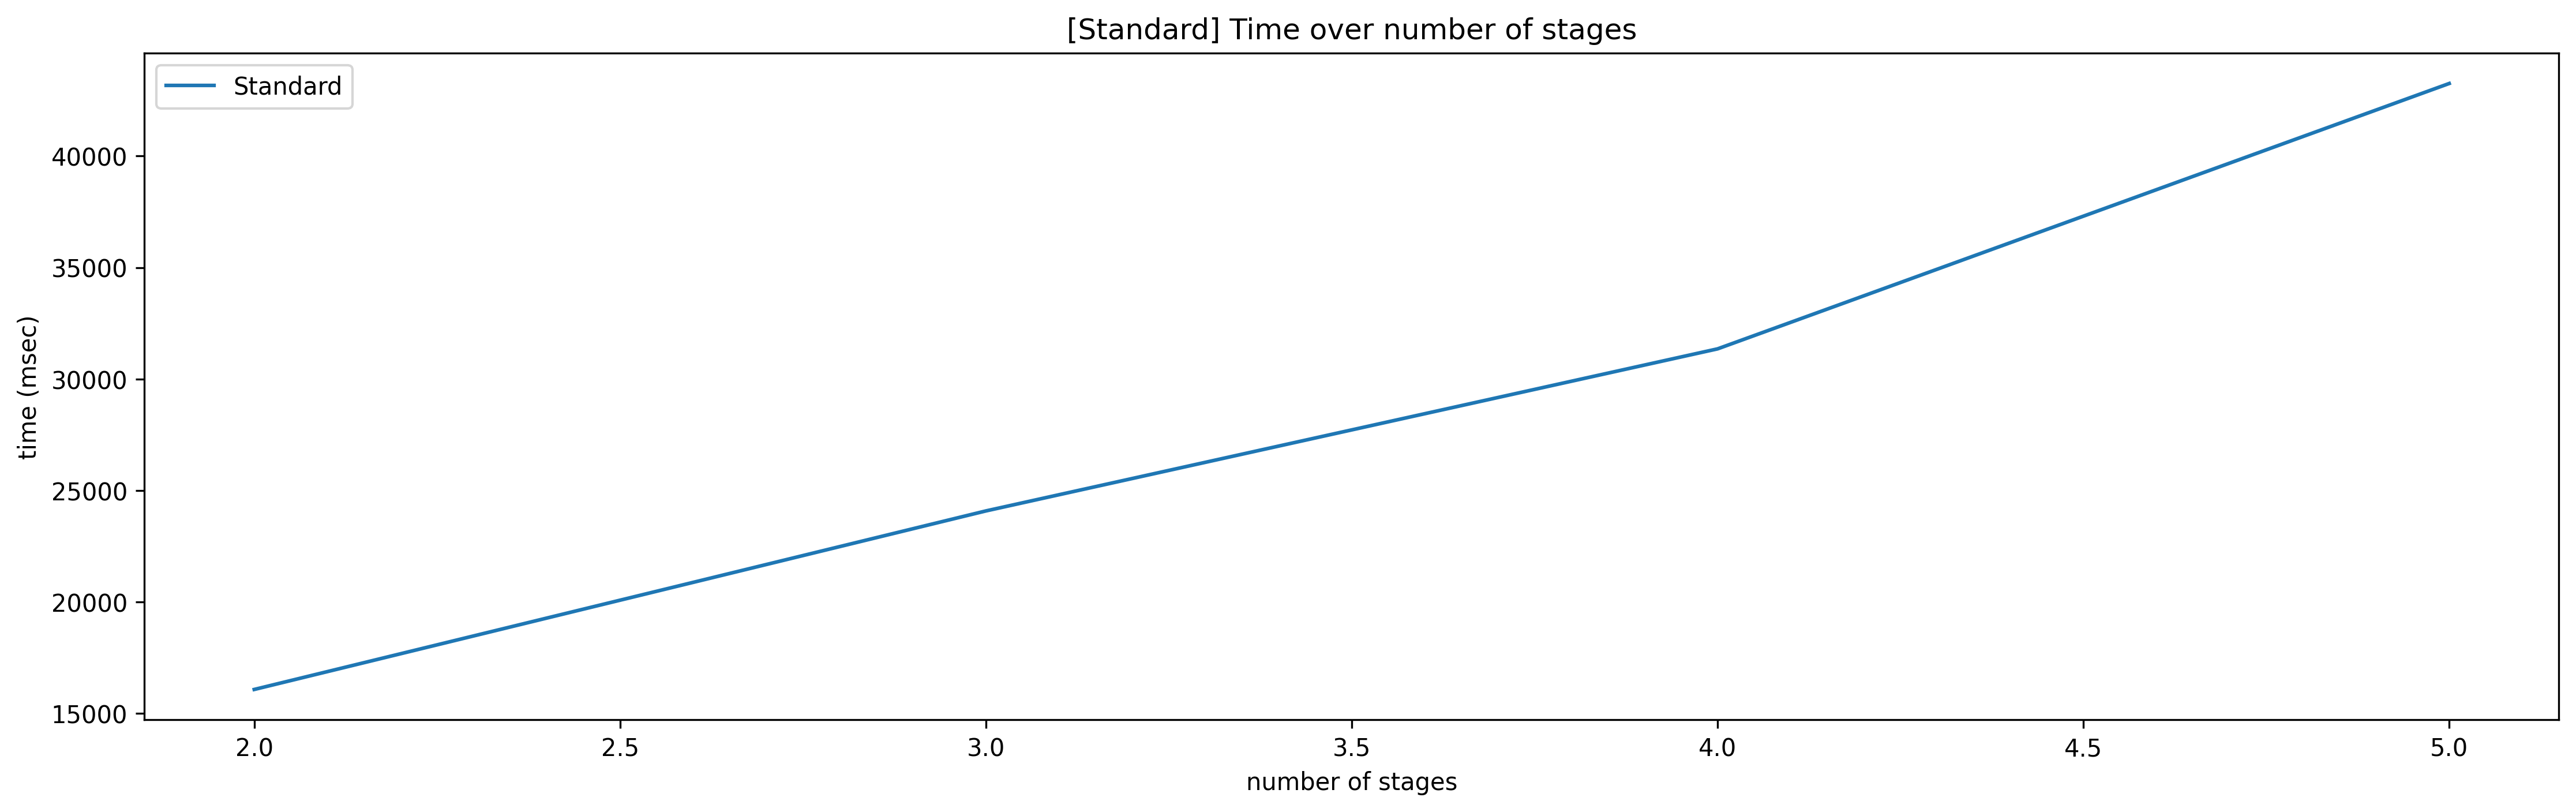

In [3]:
title = f'[Standard] Time over number of stages'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
#plt.locator_params(axis='x', nbins=30) 
#plt.locator_params(axis='y', nbins=16)
plt.plot(standard[0], standard[1], label="Standard")

axs.set_xlabel("number of stages")
axs.set_ylabel("time (msec)")

plt.title(title)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Processes

In [4]:
"""processes = [[],[]]
for i in range(2, 6): # from 2 to 5
    res = run_pipe(i, use_processes = True, use_subinterpreters = False)
    print(f"done in {res}ms")
    processes[0].append(i) # x
    processes[1].append(res) # y"""
processes = [[2, 3, 4, 5], [11487.622, 14432.537, 16920.004, 24915.781]]

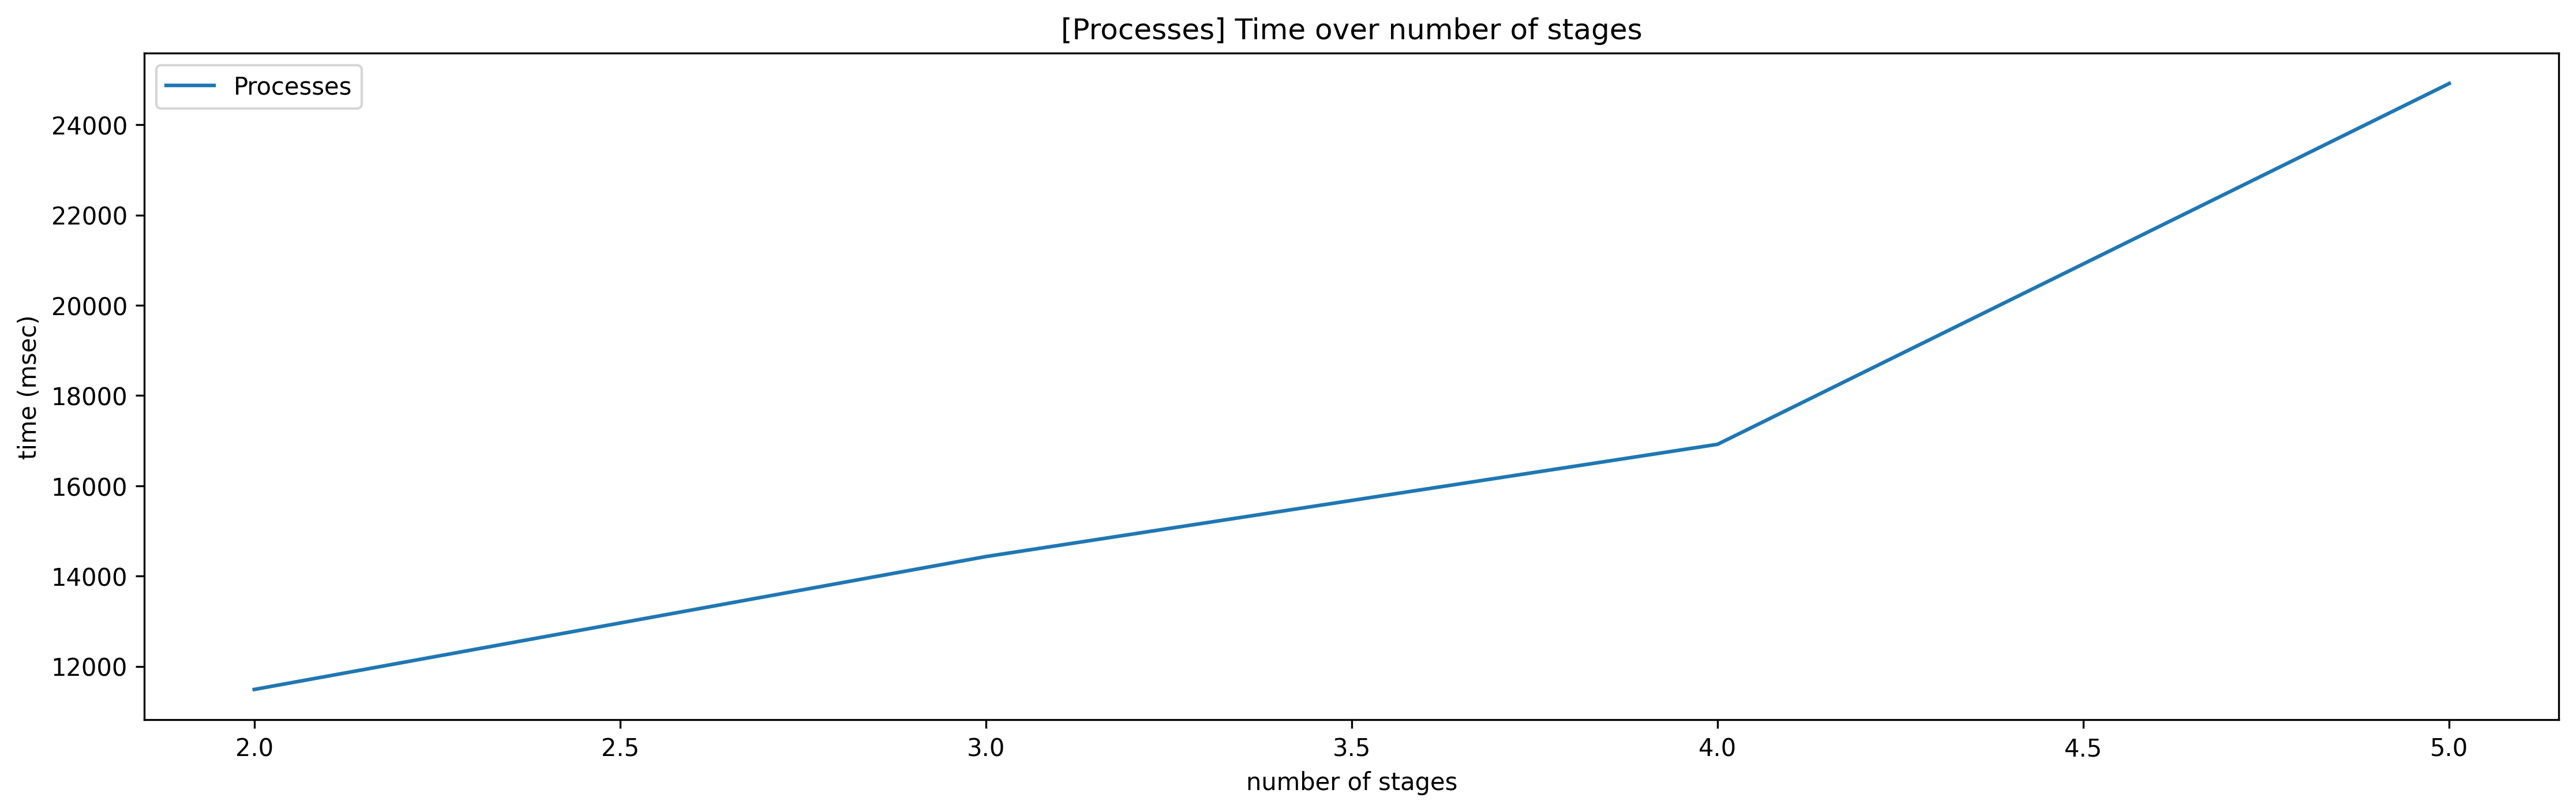

In [5]:
title = f'[Processes] Time over number of stages'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
#plt.locator_params(axis='x', nbins=30) 
#plt.locator_params(axis='y', nbins=16)
plt.plot(processes[0], processes[1], label="Processes")

axs.set_xlabel("number of stages")
axs.set_ylabel("time (msec)")

plt.title(title)
plt.legend()
#savefig("stream_service_time")
plt.show()

In [6]:
"""subinterpreters = [[],[]]
for i in range(2, 6): # from 2 to 5
    res = run_pipe(i, use_processes = False, use_subinterpreters = True)
    print(f"done in {res}ms")
    subinterpreters[0].append(i) # x
    subinterpreters[1].append(res) # y"""
subinterpreters = [[2, 3, 4, 5], [8303.902, 10745.053, 12867.374, 19906.417]]

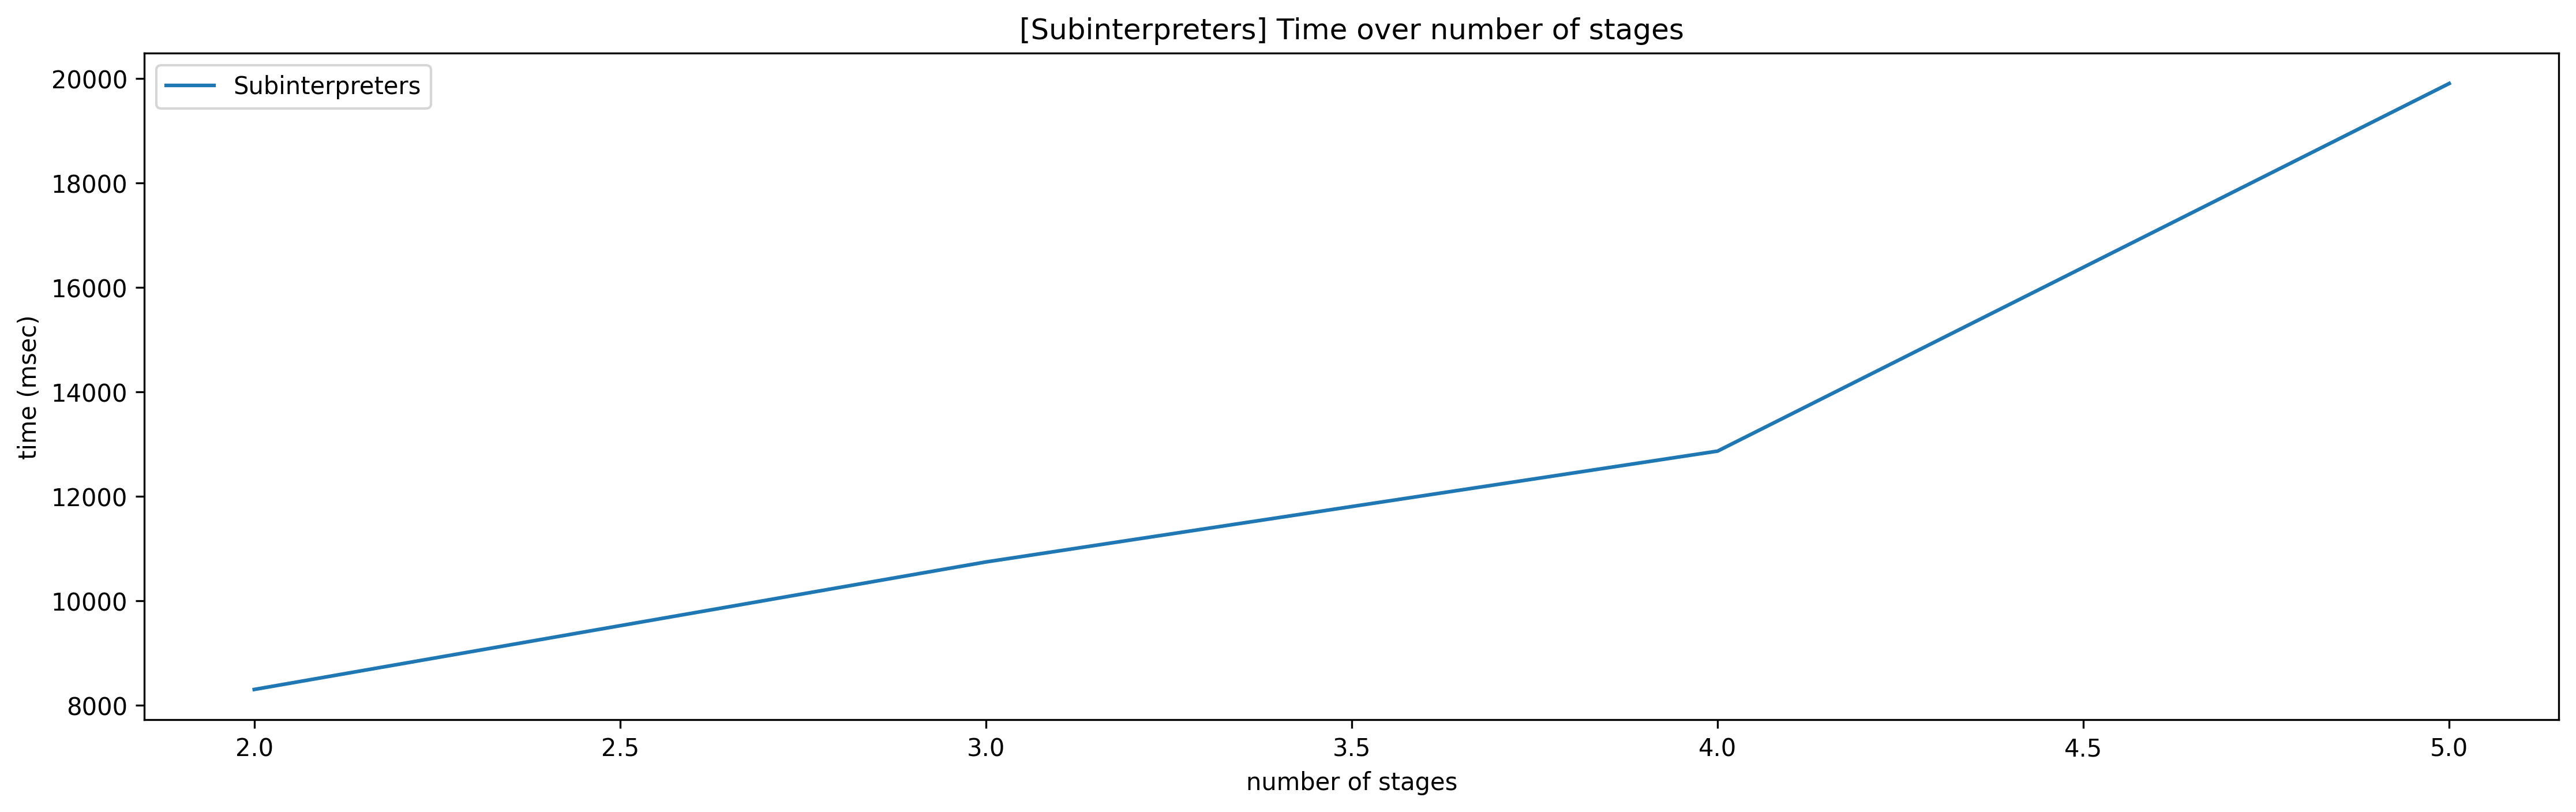

In [7]:
title = f'[Subinterpreters] Time over number of stages'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
#plt.locator_params(axis='x', nbins=30) 
#plt.locator_params(axis='y', nbins=16)
plt.plot(subinterpreters[0], subinterpreters[1], label="Subinterpreters")

axs.set_xlabel("number of stages")
axs.set_ylabel("time (msec)")

plt.title(title)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Comparison

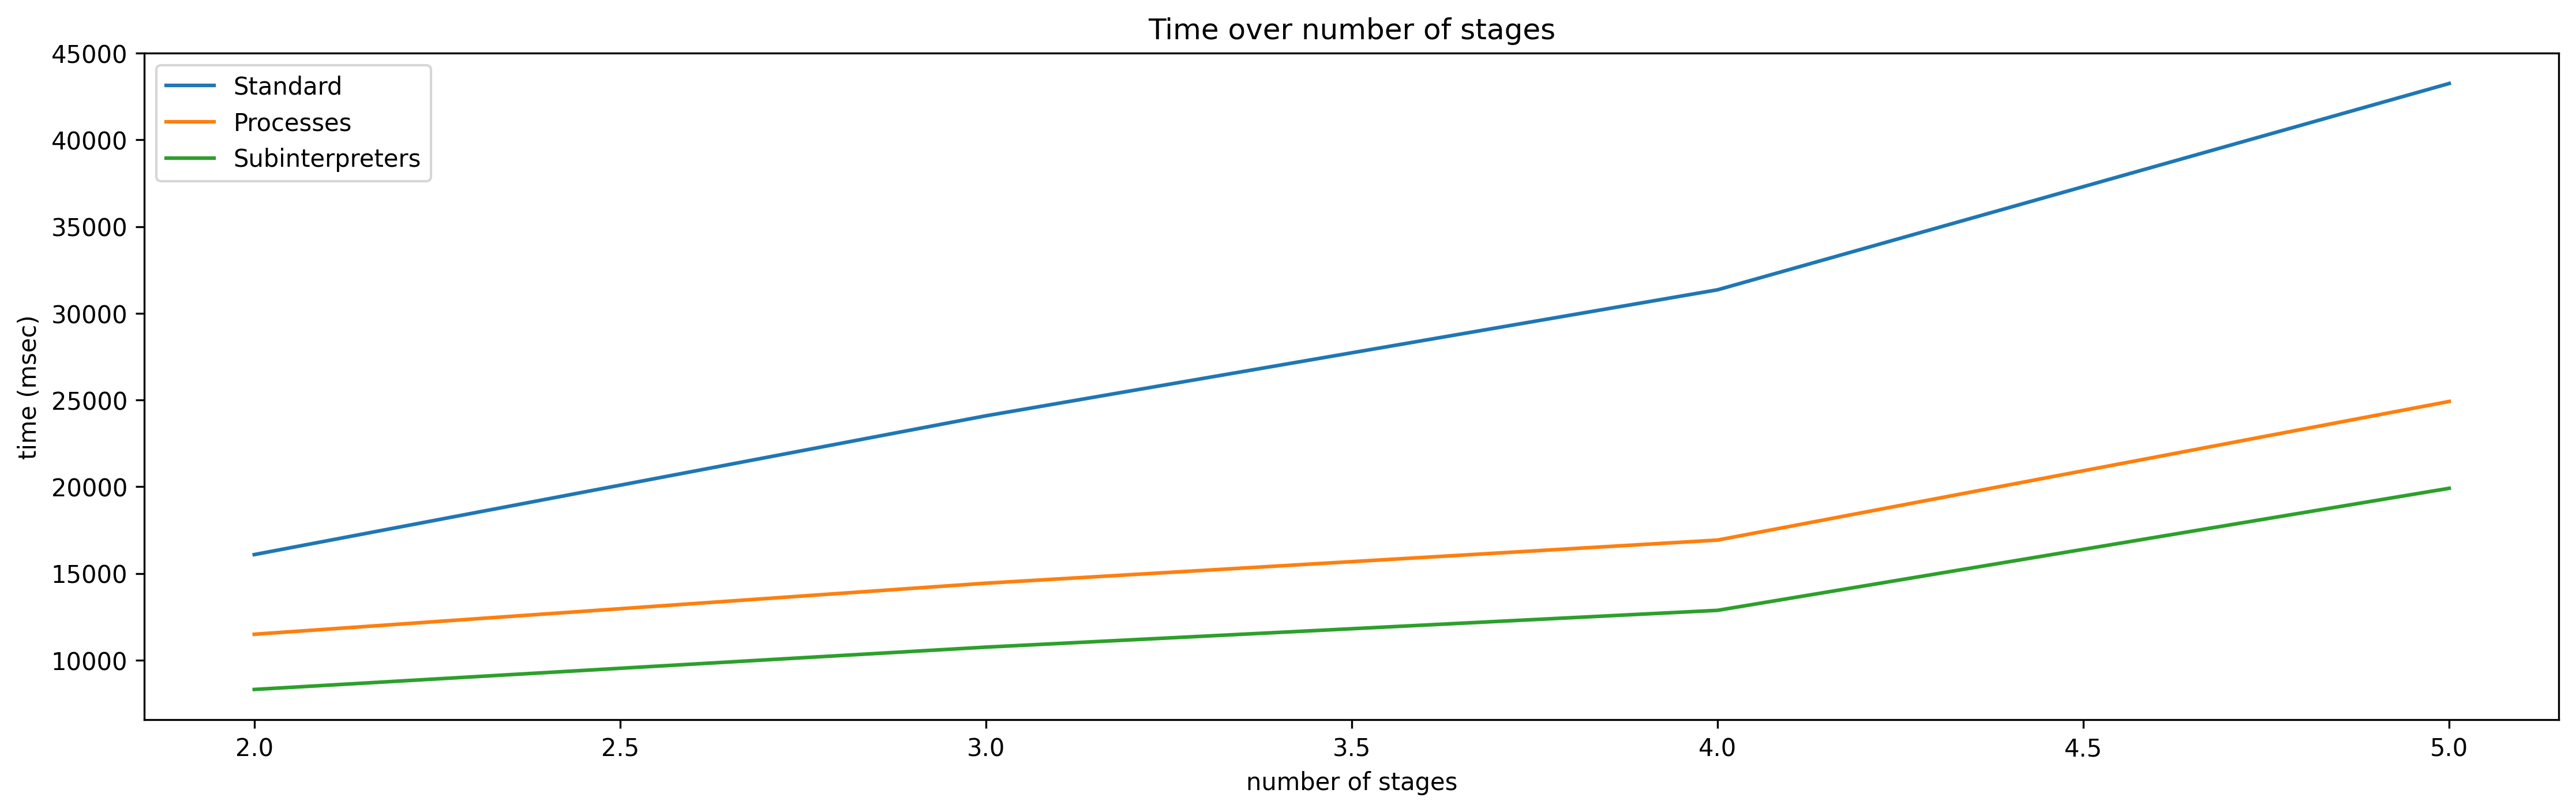

In [8]:
title = f'Time over number of stages'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
#plt.locator_params(axis='x', nbins=30) 
#plt.locator_params(axis='y', nbins=16)
plt.plot(standard[0], standard[1], label="Standard")
plt.plot(processes[0], processes[1], label="Processes")
plt.plot(subinterpreters[0], subinterpreters[1], label="Subinterpreters")

axs.set_xlabel("number of stages")
axs.set_ylabel("time (msec)")

plt.title(title)
plt.legend()
#savefig("stream_service_time")
plt.show()